# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# import usefull libraries
import csv
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import random
import tensorflow as tf
import time as time
from sklearn.utils import shuffle

print('lucky day, the kernel seems to work :-)')

lucky day, the kernel seems to work :-)


In [2]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
#for i in range(500,600):
#    print(y_train[i])
    
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [len(X_train[0]),len(X_train[0][0]),len(X_train[0][0][0])]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Answer:
The data visualisation proposed is as follow
- checking the distribution of the classes in both the training set and the validation set, they should be ~ proportional
- display a random set of images to get a feel for the pre processing treatment to apply
- checking on some random samples that the data (pictures) corespond to the labels

#### Check of the classes distribution in the sets:

taining set distribution and test set distribution:


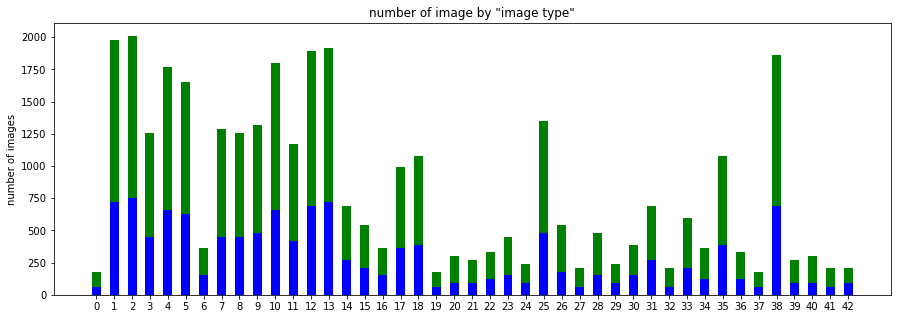

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

# Visualizations will be shown in the notebook.
%matplotlib inline

# visualisation of the distribution ofrandom_images(): the number of samples per type
def plot_sample_distribution(plot_set1,plot_set2):
    qty1=[]
    qty2=[]
    for i in set(plot_set1):
        qty1.append(list(plot_set1).count(i))
    for i in set(plot_set2):
        qty2.append(list(plot_set2).count(i))
    N1 = len(set(plot_set1))
    N2 = len(set(plot_set2))
    ind1 = np.arange(N1)        # the x locations for the groups
    ind2 = np.arange(N2)
    width = 0.5
    # the width of the bars
    fig, ax = plt.subplots(figsize=(15,5))
    rects1 = ax.bar(ind1, qty1, width, color='g')
    rects2 = ax.bar(ind2, qty2, width, color='b')
    # add some text for labels, title and axes ticks
    ax.set_ylabel('number of images')
    ax.set_title('number of image by "image type"')
    ax.set_xticks(ind1)
    plt.show()

# Activate the displays
print('taining set distribution and test set distribution:')
plot_sample_distribution(y_train,y_test)


#### conclusion:
    The training and test sets seems to be distributed in the same way across the 'image types' or "labels"

#### visualisation of a limited number of images:

Random images samples


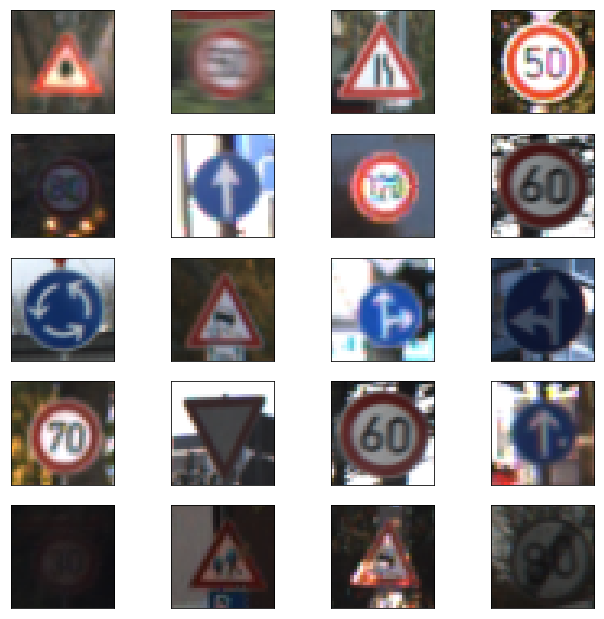

In [5]:
# visualisation of a limited number of images of a training set
def plot_random_images():
    plt.figure(figsize = (11,11))
    n_row=5
    n_col=4
    plt.autoscale(False)
    for row in range (n_row):
        for col in range (n_col):
            #print(row,col)
            image=X_train[np.random.randint(len(y_train))]
            plt.subplot(n_row,n_col,(col+1)+(row*n_col))
            #print(row,col,(col+1)+(row*n_col))
            fig = plt.imshow(image)
            fig.set_cmap('hot')
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
    plt.show()

plt.ion()
print('Random images samples')
plot_random_images()

#### conclusion:
    Some images appear very dark vith very limited contrast, some pre-processing could be helpfull

#### Limited check of the corespondence of the labels with the images:

Random Images with associated Labels

label = Slippery road


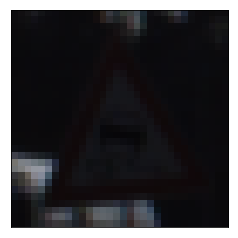

label = Road work


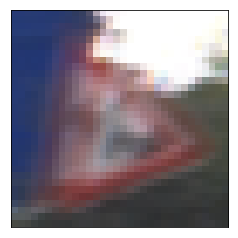

label = Go straight or right


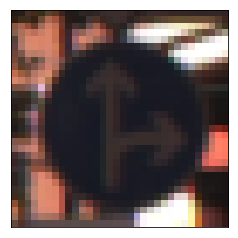

label = Yield


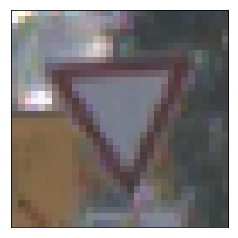

label = Yield


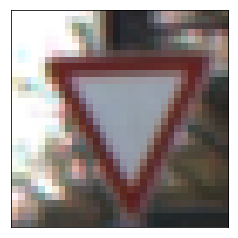

In [6]:
# reading of the labels titles from the csv file
label_text=['']*len(set(y_train))
with open('signnames.csv') as csvfile:
    next(csvfile)
    reader = csv.reader(csvfile)
    for row in reader:
        label_text[int(row[0])]=row[1]
                       
def plot_random_images_with_labels(n_pictures):
    # function extracting a few random images and printing the associated label
    for i in range(n_pictures):
        x=np.random.randint(len(y_train))
        image=X_train[x]
        label=y_train[x]
        print('label =',label_text[label])
        fig = plt.imshow(image)
        fig.set_cmap('hot')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.show()

print('Random Images with associated Labels')
print('')
plot_random_images_with_labels(n_pictures=5)        

#### conclusion:
    The pictures seems to correspond to the labels :-)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

In [7]:
### Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Question1
Techniques used to pre process the data

###### The pre-processing tested: 
- transforming the image to gray scale
- increasing the picture contrast:
    - either globaly on the 3 colors 
    - or individualy by channel
- reformating the image:
    - by normalising [0,255] => [0,1]
    - and centering [0,1] => [-0.5,0.5]

###### The pre processing selected:
- increasing the picture contrast globaly (not much difference seen with the individual channels) [minI,maxI]=>[0,255]
- transforming into a gray picture, this reduces the image to 1 layer (since the paper show that the results are kind of similar)
- normalazing and centering of the values [0,255] => [-0.5,0.5]

Random images samples raw and tuned


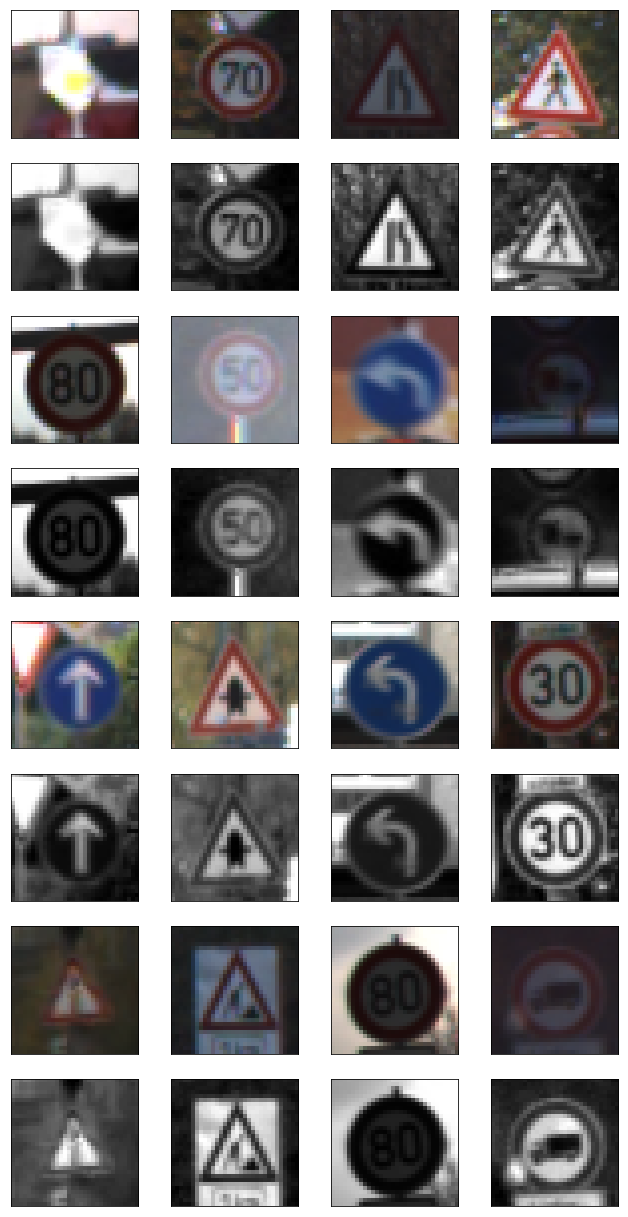

In [8]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def picture_contrast_boost(image):
    # the image luminosity is stretched to go from 0 to 255 [0,255]
    max_level=np.amax(image)
    min_level=np.amin(image)
    if max_level!=min_level:
        # if the image is not just 1 color
        alpha=255/(max_level-min_level) 
        beta=- alpha*min_level 
        new_image=(alpha*image+beta).astype(np.uint8) # contrast is increased and normalised
    else:
        # case of image = just one color, no contrast
        new_image=image
    return new_image

def picture_histogram_boost(image):
    # this method does not seem to work better than the "picture_contrast_boost" where all the chanels are processed together
    new_image=image
    new_image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    new_image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    new_image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return new_image

def YUV_normalization(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,0]=0#hsv[:,:,0]
    hsv[:,:,1]=0#hsv[:,:,1]
    hsv[:,:,2]=hsv[:,:,2]
    hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray

def picture_normalize(image):
    # the image pixel values are then normalised to within [0,1]
    new_image=image/255 # image just normalised
    return new_image

def picture_centered(image):
    # the pixel valies are moved fron [0,1] to [-0.5,0.5]
    new_image=image-0.5
    return new_image

def picture_gray_conversion(image):
    new_image= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return(new_image)

def plot_random_images_tuned():
    plt.figure(figsize = (11,22))
    n_row=4
    n_col=4
    plt.autoscale(False)
    for row in range (n_row):
        for col in range (n_col):
            # show original image
            image=X_train[np.random.randint(len(y_train))]
            plt.subplot(n_row*2,n_col,(col+1)+(row*2*n_col))
            fig = plt.imshow(image)
            fig.set_cmap('hot')
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            # show modified image1
            new_image=picture_contrast_boost(image)
            new_image=picture_gray_conversion(new_image)
            new_image=picture_normalize(new_image)
            plt.subplot(n_row*2,n_col,(col+1)+((row*2+1)*n_col))
            fig = plt.imshow(new_image,cmap='gray')
            #fig.set_cmap('hot')
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
    plt.show()
    
plt.ion()
print('Random images samples raw and tuned')
plot_random_images_tuned()

# note: other possible pre-processing steps
# try to feed the network with gray scale + canny edges detection

#### conclusion:
    The pre processing seems to bring a slight improvement in the images 'readability'
    let's hope that will be enough for the ConvNet :-)

#### The pre-processing is applied to X_train and X_test

In [9]:
def pre_process_image(image):
    # this function is only called 
    new_image=picture_contrast_boost(image)
    new_image=picture_gray_conversion(new_image)
    new_image=picture_normalize(new_image)
    new_image=picture_centered(new_image)
    #upgrade of the format to keep the tensor shape
    new_image=np.expand_dims(new_image,axis=2)
    return new_image


X_train=np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],dtype = np.float32)
X_valid=np.array([pre_process_image(X_valid[i]) for i in range(len(X_valid))],dtype = np.float32)
X_test=np.array([pre_process_image(X_test[i]) for i in range (len(X_test))],dtype=np.float32)

### Question 2
Neural network architecture

#### The architecture choosen is a 2 stage ConvNet architecture, similar to the LeNet-5 architecture, the steps are as follow:
    layer 1: 
        convolution :
            5x5 filter, input depth of 1, output depth of 6
            32x32x1 => 28x28x6
        Activation with Relu
            max(0,x)
        Pooling 
            2x2 kernel with 2x2 stride
            28x28x6 => 14x14x6
    layer 2:
        convolution :
            5x5 filter, input depth of 6, output depth of 16
            14x14x16 => 10x10x16
        Activation with Relu
            max(0,x)
        Pooling 
            2x2 kernel with 2x2 stride
            10x10x16 => 5x5x16
    output is flatten into a vector
        5x5x16 => 5*5*16=400
    layer 3: 
        vector passed through a fully connected layer:
            input size 400
            output size 120
        Activation with Relu
            max(0,x)
    Layer 4:
        vector passed through a fully connected layer
            input size 120
            output size 84
        Activation with Relu
                max(0,x)
    Layer 5:
        vector passed through the output network
            input size= 84
            output size = number of labels = 43

### Model Architecture

#### Simulation variables:

In [10]:
# Define simulation variables
EPOCHS=20      # note : to be increase if error is too large
batch_size=100  # note : to be reduced if too slow to process

#### initialization of the weights and bias:

In [11]:
# hyperparameters
mean=0
sigma=0.1

# initialization of the weights and bias

def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape,mean,sigma))

def init_biases(length):
    return tf.Variable(tf.zeros(length)) 
    # note: could be offset if needed may improve result => tf.constant(0.05, shape=[length]))

#### definition of a flattening function:

In [12]:
def flatten(input_array):  # function can be supressed
    layer_shape = input_array.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(input_array, [-1, num_features])
    return layer_flat

#### Main structure:

In [13]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
       
    return logits

#### features and Labels

In [14]:
#image_size=[32,32]
#image_channels=1     # the images are reduced to gray during pre processing

x = tf.placeholder(tf.float32,shape=[None,32,32,1])
y = tf.placeholder(tf.int32, (None)) 
one_hot_y=tf.one_hot(y,n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

- Train your model here.
- Calculate and y_trainreport the accuracy on the training and validation set.
- Once a final model architecture is selected, 
- the accuracy on the test set should be calculated and reported as well.
- Feel free to use as many code cells as needed.

In [15]:
rate=0.001
Logits=LeNet(x) #X_pre_processed_train)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Logits,labels=one_hot_y)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(cost)

#### Model evaluation

In [16]:
correct_prediction = tf.equal(tf.argmax(Logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

#### evaluate a set accuracy function:

In [17]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    #print(num_examples)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the model

In [18]:
start_time = time.time()
validation_accuracy_list=[]
training_accuracy_list=[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    proceed=True
    i=0
    while proceed:
        #for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_list.append(validation_accuracy)
        training_accuracy = evaluate(X_train, y_train)
        training_accuracy_list.append(training_accuracy)
        print("EPOCH {} ...".format(i+1)," Validation Accuracy = {:.1f}".format(validation_accuracy*100),'%')
        i+=1
        rate*=0.85  # the learning rate is reduced epoch after epoch
        # test to stop the process if the accuracy do not change over the 10 preceding epochs
        if i>20 :
            progress=abs(np.amax(validation_accuracy_list[i-5:])-np.amin(validation_accuracy_list[i-5:]))
            if (progress<0.0005) or (i>100):
                proceed=False
                test_accuracy = evaluate(X_test, y_test)
                print()
                print("Final Epoch ...    Test Accuracy = {:.1f}".format(test_accuracy*100),'%')
    EPOCHS=i            
    saver.save(sess, './lenet')
    print("Model saved")


end_time= time.time()
training_time=end_time-start_time
print ('CPU training time',int(training_time/60),'mn',int(training_time%60) )

Training...
EPOCH 1 ...  Validation Accuracy = 81.0 %
EPOCH 2 ...  Validation Accuracy = 88.0 %
EPOCH 3 ...  Validation Accuracy = 89.9 %
EPOCH 4 ...  Validation Accuracy = 89.6 %
EPOCH 5 ...  Validation Accuracy = 90.0 %
EPOCH 6 ...  Validation Accuracy = 90.4 %
EPOCH 7 ...  Validation Accuracy = 91.9 %
EPOCH 8 ...  Validation Accuracy = 91.2 %
EPOCH 9 ...  Validation Accuracy = 92.4 %
EPOCH 10 ...  Validation Accuracy = 91.8 %
EPOCH 11 ...  Validation Accuracy = 92.5 %
EPOCH 12 ...  Validation Accuracy = 92.9 %
EPOCH 13 ...  Validation Accuracy = 92.8 %
EPOCH 14 ...  Validation Accuracy = 92.3 %
EPOCH 15 ...  Validation Accuracy = 94.0 %
EPOCH 16 ...  Validation Accuracy = 92.4 %
EPOCH 17 ...  Validation Accuracy = 92.3 %
EPOCH 18 ...  Validation Accuracy = 93.8 %
EPOCH 19 ...  Validation Accuracy = 93.5 %
EPOCH 20 ...  Validation Accuracy = 92.5 %
EPOCH 21 ...  Validation Accuracy = 93.2 %
EPOCH 22 ...  Validation Accuracy = 91.4 %
EPOCH 23 ...  Validation Accuracy = 94.5 %
EPOCH 24

 training accuracy progress with epochs


(0, 68)

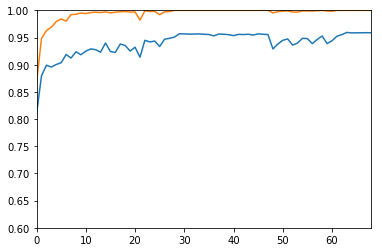

In [19]:
print(' training accuracy progress with epochs')
plt.plot(validation_accuracy_list)
plt.plot(training_accuracy_list)
plt.ylim(0.6,1.)
plt.xlim(0,EPOCHS-1)

#### Conclusion:
To date I have obtained with this model ~96% validation accuracy, and 93% test accuracy.
This result was achieved with the following parameters:
    - I have used a decreasing learning rate:
        - starting rate= 1E-3
        - rate per epoch = rate*(0.85^epoch)
    - the batch size is 100
    - training stopped @ 59 epochs (when the validation-accuracy stopped progerssing)
    
A way to improve the model further may be to :
    - drop some branches during the training to increase the network robustness
    - add some convolution steps to increase the degree of freedom of the system
    - increase of the training set with 'jittering'

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def plot_some_images():
    plt.figure(figsize = (12,2))
    n_row=1
    n_col=len(os.listdir(img_dir))
    plt.autoscale(False)
    print()
    print('%-20s%-20s'%('image name','image label'))
    print('-----------------------------------')
    for row in range (n_row):
        for col in range (n_col):
            i=(col+1)+(row*n_col)
            imgFileName= img_dir + os.listdir(img_dir)[i-1]
            #image=process_new_image(imgFileName)
            plt.subplot(n_row,n_col,i)
            image = cv2.imread(imgFileName)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            print('%-20s%-20s'%(os.listdir(img_dir)[i-1],true_label[i-1]))
            fig = plt.imshow(image)
            fig.set_cmap('hot')
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
img_dir='traffic_sign_example_images/'
true_label=[label_text[17],label_text[40],label_text[1],label_text[14],label_text[20],label_text[13]]
true_ref=[17,40,1,14,20,13]
plot_some_images() 

### Predict the Sign Type for Each Image

- Run the predictions here and use the model to output the prediction for each image.
- Make sure to pre-process the images with the same pre-processing pipeline used earlier.
- Feel free to use as many code cells as needed.

In [ ]:
def process_new_image(name):
    image = cv2.imread(name)
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image/255-.5
    image= image[:,:,np.newaxis] # to gete to shape (32,32,1)
    #print(image.shape)
    return image

img_dir = "traffic_sign_example_images/"

test_image_set = np.array([process_new_image(img_dir+name) for name in os.listdir(img_dir)]
                       ,dtype = np.float32)  #.astype(np.float32)
test_image_name = [name for name in os.listdir(img_dir)]

#fig = plt.imshow(test_image_set[0])
#print(test_image_set.shape)
#print(test_image_name.shape)
#print(test_image_set.shape)
#b=test_image_set[0]
#print(b.shape)

### run the images through the classifier

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    print('Model restored with latest weights')
    top_five = sess.run(tf.nn.top_k(tf.nn.softmax(Logits), k=5), feed_dict={x: test_image_set})
    print("Top five: ", top_five)

In [ ]:
def image_of_type(image_label):
    i=0
    while y_test[i] != image_label:
        i += 1
    return X_test[i]

for i in range (len(test_image_set)):
    # go through images
    # display image
    print('')
    print(' Test image,    pre processed image,           Good answer,         Test image estimate')
    plt.figure(figsize = (12,2))
    # first image
    imgFileName= img_dir + os.listdir(img_dir)[i]
    image = cv2.imread(imgFileName)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,1)
    fig = plt.imshow(image)
    fig.set_cmap('hot')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    # second image
    image= process_new_image(imgFileName)[:,:,0]+ 0.5 # +0.5 to remove centering and get a more readable image
    plt.subplot(1,4,2)
    fig = plt.imshow(image,cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    # third image
    plt.subplot(1,4,3)
    image= image_of_type(true_ref[i])
    fig = plt.imshow(image[:,:,0],cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    #fourth image
    plt.subplot(1,4,4)
    image= image_of_type(top_five[1][i][0])
    fig = plt.imshow(image[:,:,0],cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
    # display convNet top 5 predictions with ponfidence level
    print('%-12s%-30s%-20s%-30s%-20s' % ('prediction','predicted label','confidence level','true label','conclusion'))
    for j in range(len(top_five[0][0])):
        # go through ladels
        guess_label=top_five[1][i][j]
        guess_label_proba=top_five[0][i][j]
        if label_text[guess_label]==true_label[i]:
            conclusion='ok'
        else:
            conclusion='nok'
        print('%-12i%-30s%-20g%-30s%-20s' % (j+1,label_text[guess_label],guess_label_proba,true_label[i],conclusion))

In [ ]:
#### conclusion:
    Not a great performance, only 2 out of 6 signs were properly identified as first estimation
    The generalisation from signs which bo not belong to the original data is poor
    Possible explanation:
        - It looks like the NN do not detect fine details, a way to improve the system may be to add a convolution layer
        - Some images have got different pannel shape than the one on the training set, this may explain some of the errors
        - Some if the test images are bigger than the one in the test set
        - Possible data overfitting

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 2 out of 6 signs correctly, it's 33% accurate on these new images.

- The model predicted 3 out of 6 signs, therefore it is ~50% accurate
- but of course 6 images is not a large enough sample to provide representative accuracy estimation
    

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

- Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
- Feel free to use as many code cells as needed.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    top_five = sess.run(tf.nn.top_k(tf.nn.softmax(Logits), k=5), feed_dict={x: test_image_set})
    print("Top five: ", top_five)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input =process_new_image(image_input)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 